<a href="https://colab.research.google.com/github/ikwak2/testrepository/blob/main/Skellam_95CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 95% CI for Skellam distribution

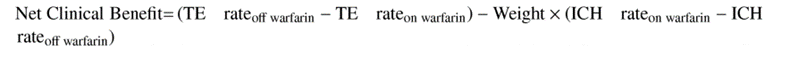

해당 수식에서 $TE_{\text{off warfarin}}$, $TE_{\text{on warfarin}}$, $ICH_{\text{off warfarin}}$, $ICH_{\text{on warfarin}}$ 를 각각 서로 독립인 Poi($\theta_1$), Poi($\theta_2$), Poi($\theta_3$), Poi($\theta_4$) 로 부터 나온 Random Variable 이라고 하자


Net Clinical Benefit = [$TE_{\text{off warfarin}}$ + Weight $\times$ $ICH_{\text{off warfarin}}$] - [ $TE_{\text{on warfarin}}$ + Weight $\times$ $ICH_{\text{on warfarin}}$ ]

으로 다시 표현 될 수 있으며, [$TE_{\text{off warfarin}}$ + Weight $\times$ $ICH_{\text{off warfarin}}$] 는 Poi ($\theta_1+ w \theta_3$), [ $TE_{\text{on warfarin}}$ + Weight $\times$ $ICH_{\text{on warfarin}}$ ] 는 Poi($\theta_2+ w \theta_4$) 를 따른다.

Net Clinical Benefit 는 두 Poisson 분포의 차이므로, Skellam($\theta_1+ w \theta_3$, $\theta_2+ w \theta_4$) 분포를 따르게 된다 


$\gamma_1 = \theta_1+ w \theta_3$, $\gamma_2 = \theta_2+ w \theta_4$ 라고 할 때, Skellam($\gamma_1$, $\gamma_2$) 의 95% 신뢰구간을 구해보자.

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [1]:
install.packages("extraDistr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(extraDistr)

$\gamma_1, \gamma_2$ 가 아래와 같다고 하자. 95% CI는

In [3]:
gamma_1 = 2.200701 ; gamma_2 = 2.156248

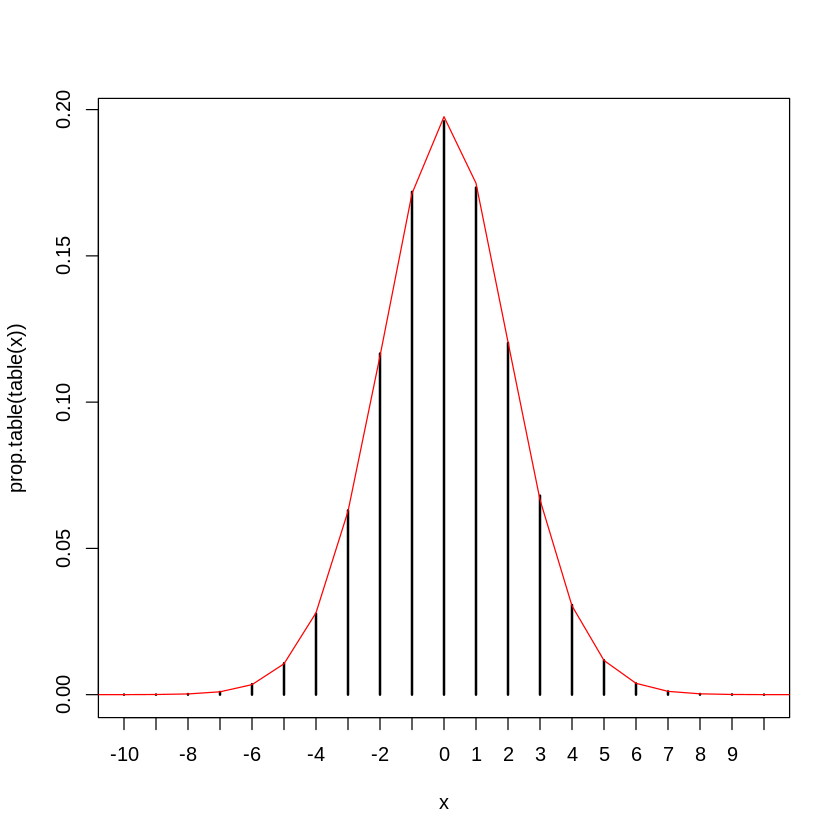

In [7]:
x <- rskellam(1e5, gamma_1, gamma_2)
xx <- -40:40
plot(prop.table(table(x)), type = "h")
lines(xx, dskellam(xx, gamma_1, gamma_2), col = "red")

먼저 -30, 30 사이의 정수 값에서의 확률 값들을 합하면 1 이 되는 것을 확인한다

In [18]:
vec = dskellam(-30:30, gamma_1, gamma_2)
sum(vec)

[1] 1

이제 양측에서 확률값이 더 조금 추가되는 정수들을 더해주면서, 유의수준인 alpha 값이 0.05 보다 커지는 시점까지 양측 값들을 업데이트 해준다.

In [19]:
a = -29 ; b = 29 

area_a = sum(dskellam(-30:a, gamma_1, gamma_2)) 
area_b = sum(dskellam(b:30, gamma_1, gamma_2))

while(area_a + area_b < 0.05 ) {
  if(dskellam(a, gamma_1, gamma_2) < dskellam(b, gamma_1, gamma_2) ) a = a + 1 else b = b - 1 

  area_a = sum(dskellam(-30:a, gamma_1, gamma_2)) 
  area_b = sum(dskellam(b:30, gamma_1, gamma_2))
}

In [23]:
a

[1] -4

In [24]:
b

[1] 5

계산된 정수값이 (a+1):(b-1) 인 구간이 95% 신뢰구간이 된다. 확인하면 아래와 같다.

In [31]:
vec = dskellam((a+1):(b-1), gamma_1, gamma_2)
vec = dskellam(-3:4, gamma_1, gamma_2)
sum(vec)

[1] 0.9396649

으로부터 신뢰구간은 -3<= X <= 4 가 계산된다